In [28]:
#Imports
import os
from os import path

# Imports url
import urllib.request
from bs4 import BeautifulSoup
import html2text

#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np

#Plot
import matplotlib.pyplot as plt
import seaborn as sns

#Pandas
import pandas as pd
import pandas_profiling

#text processing
import nltk
from textblob import TextBlob

In [231]:
phoebes_songs = open('phoebes_songs.txt', 'r') 
songs = phoebes_songs.read();

In [232]:
def add_stopwords_to_wordcloud(stop_friends_on_off):
    '''
    Set on and off stopwords - whether to use Friends names or not. If 'True' it will add Friends names to stopwords.
    
    Parameters:
    ----------
    stop_friends_on_off - True/False statement.
    
    Return:
    ------
    stopwords - list of the used stopwords.
    '''
    
    stopwords = set() #set(STOPWORDS) for default exclusion
    
    stopwords.add("Scene")
    print(stopwords)
    # Need to add stopwords for Frinds if I don't want to show their names
    stop_friends = stop_friends_on_off

    if stop_friends == True:
        stopwords.add("Monica")
        stopwords.add("Rachel")
        stopwords.add("Ross")
        stopwords.add("Phoebe")
        stopwords.add("Chandler")
        stopwords.add("Joey")
        print('Friends names will be excluded.')
    else:
        print('Firends names will be included.')

    return stopwords


In [233]:
stopwords = add_stopwords_to_wordcloud(True);

{'Scene'}
Friends names will be excluded.


In [234]:
max_font_size = 100
min_font_size = 3
bck_color = 'white'
#width = 500
#height = 300
width=1600
height=800
colourmap = plt.cm.cividis_r
relative_scaling = 0

def generate_wordcloud_bilinear(episode, max_font_size ):
    '''
    Make a wordcloud based on the episode. Use bilinear interpolation and max font size.
    
    Parametes:
    ---------
    episode - txt of the loaded episode.
    font_size - Integer. Maximum font size used on the image.
    
    Return:
    ------
    Makes a wordcloud and plots it.
    '''
    
    # lower max_font_size
    wordcloud = WordCloud(width=width, height=height, background_color=bck_color, 
                          max_font_size=max_font_size, stopwords=stopwords, colormap = colourmap,
                         relative_scaling=relative_scaling).generate(episode)
    
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    fig.tight_layout()
    fig.savefig("Phoebe_songs.png", transparent=True)

    # The pil way (if you don't have matplotlib)
    # image = wordcloud.to_image()
    # image.show()

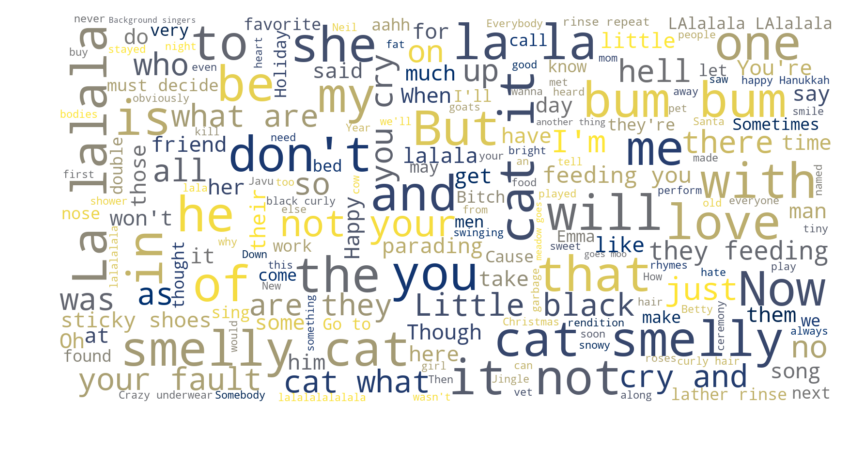

In [235]:
generate_wordcloud_bilinear(songs, max_font_size)

In [236]:
text = 'This is a bit bad'

#put into textblob
obj = TextBlob(songs)

#find sentiment [0 objective; 1subjective]
print(obj.sentiment)

#returns values between -1 and 1
sentiment = obj.sentiment.polarity
print(sentiment)

Sentiment(polarity=0.08177239111898202, subjectivity=0.5284628755083299)
0.08177239111898202


In [237]:
obj.words;

In [238]:
obj.sentences;

In [239]:
sentence_pol = []
sentence_sub = []
for sentence in obj.sentences:
    print(sentence.sentiment)
    print(sentence)
    sentence_pol.append(sentence.sentiment[0])
    sentence_sub.append(sentence.sentiment[1])

Sentiment(polarity=0.40714285714285714, subjectivity=0.6642857142857144)
Love is sweet as summer showers
Love is a wondrous work of art
But your love, oh your love,
Your love is like a giant pigeon
Crapping on my heart.
Sentiment(polarity=0.0, subjectivity=0.0)
La la la la la.
Sentiment(polarity=-0.006818181818181834, subjectivity=0.2772727272727273)
New York City has no power,
and the milk is getting sour.
Sentiment(polarity=0.25, subjectivity=1.0)
But to me it is not scary,
'cause I stay away from dairy.
Sentiment(polarity=0.0, subjectivity=0.0)
LA la, la LA la, LA la.
Sentiment(polarity=0.3, subjectivity=0.1)
I made a man with eyes of coal
and a smile so bewitchin'.
Sentiment(polarity=-0.2, subjectivity=0.4)
How was I supposed to know
that my mom was dead in the kitchen?
Sentiment(polarity=0.0, subjectivity=0.0)
La lalala laaa la lala La lalala la la.
Sentiment(polarity=-0.09375, subjectivity=0.25)
My mother's ashes, even her eyelashes,
are resting in a little yellow jar.
Sentiment(

In [240]:
store_pol = []
wordss = []
for word in obj.words:
    print(word)
    print(TextBlob(word).sentiment.polarity)
    store_pol.append(TextBlob(word).sentiment.polarity)
    wordss.append(word)
    #print(sentiment.polarity)

Love
0.5
is
0.0
sweet
0.35
as
0.0
summer
0.0
showers
0.0
Love
0.5
is
0.0
a
0.0
wondrous
0.0
work
0.0
of
0.0
art
0.0
But
0.0
your
0.0
love
0.5
oh
0.0
your
0.0
love
0.5
Your
0.0
love
0.5
is
0.0
like
0.0
a
0.0
giant
0.0
pigeon
0.0
Crapping
0.0
on
0.0
my
0.0
heart
0.0
La
0.0
la
0.0
la
0.0
la
0.0
la
0.0
New
0.13636363636363635
York
0.0
City
0.0
has
0.0
no
0.0
power
0.0
and
0.0
the
0.0
milk
0.0
is
0.0
getting
0.0
sour
-0.15000000000000002
But
0.0
to
0.0
me
0.0
it
0.0
is
0.0
not
0.0
scary
-0.5
'cause
0.0
I
0.0
stay
0.0
away
0.0
from
0.0
dairy
0.0
LA
0.0
la
0.0
la
0.0
LA
0.0
la
0.0
LA
0.0
la
0.0
I
0.0
made
0.0
a
0.0
man
0.0
with
0.0
eyes
0.0
of
0.0
coal
0.0
and
0.0
a
0.0
smile
0.3
so
0.0
bewitchin
0.0
How
0.0
was
0.0
I
0.0
supposed
0.0
to
0.0
know
0.0
that
0.0
my
0.0
mom
0.0
was
0.0
dead
-0.2
in
0.0
the
0.0
kitchen
0.0
La
0.0
lalala
0.0
laaa
0.0
la
0.0
lala
0.0
La
0.0
lalala
0.0
la
0.0
la
0.0
My
0.0
mother
0.0
's
0.0
ashes
0.0
even
0.0
her
0.0
eyelashes
0.0
are
0.0
resting
0.0
in
0.0
a
0.0
lit

sticky
0.0
shoes
0.0
why
0.0
you
0.0
stick
0.0
on
0.0
me
0.0
baby
0.0
Parading
0.0
goats
0.0
are
0.0
parading
0.0
parading
0.0
down
-0.15555555555555559
the
0.0
street
0.0
Parading
0.0
goats
0.0
are
0.0
parading
0.0
leaving
0.0
little
-0.1875
treats
0.0
I
0.0
'm
0.0
I
0.0
'm
0.0
still
0.0
waiting
0.0
for
0.0
my
0.0
papier-mache
0.0
man
0.0
Little
-0.1875
tiny
0.0
Tarzan
0.0
swinging
0.0
on
0.0
an
0.0
nose
0.0
hair
0.0
swinging
0.0
with
0.0
the
0.0
greatest
1.0
of
0.0
ease
0.0
Holiday
0.0
Song
0.0
first
0.25
rendition
0.0
Happy
0.8
Hanukkah
0.0
Monica
0.0
May
0.0
your
0.0
Christmas
0.0
be
0.0
snowy
0.0
Joey
0.0
Happy
0.8
New
0.13636363636363635
Year
0.0
Chandler
0.0
and
0.0
Ross
0.0
Spin
0.0
the
0.0
dreidel
0.0
Rachel
0.0
Happy
0.8
happy
0.8
Hanukkah
0.0
Chandler
0.0
and
0.0
Monica
0.0
Very
0.2
merry
0.0
Holiday
0.0
Song
0.0
from
0.0
final
0.0
rendition
0.0
Went
0.0
to
0.0
the
0.0
store
0.0
sat
0.0
on
0.0
Santa
0.0
's
0.0
lap
0.0
Asked
0.0
him
0.0
to
0.0
bring
0.0
my
0.0
friends
0.0
all

In [241]:
np.asarray(store_pol)
df = pd.DataFrame({'PolPhoebe': store_pol,
                  'Words': wordss})
df.head()

,PolPhoebe,Words
0,0.50,Love
1,0.00,is
2,0.35,sweet
3,0.00,as
4,0.00,summer


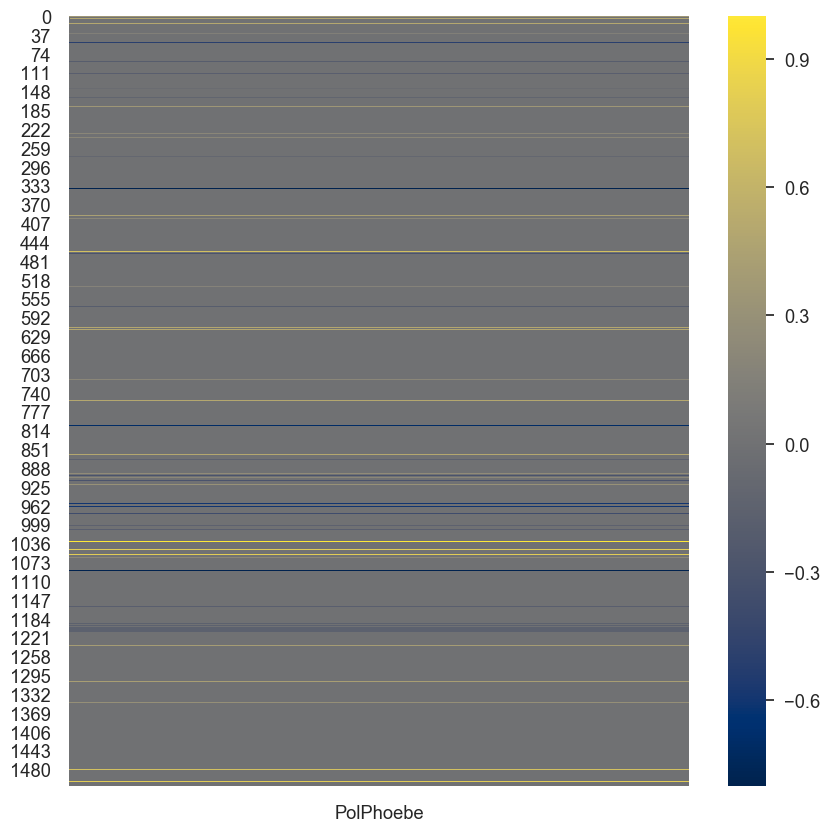

In [242]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df['PolPhoebe'].to_frame(), cmap='cividis')

In [41]:
#df = pd.read_csv('../Rob_PhD/WISE/AllChoirs.csv')
#pandas_profiling.ProfileReport(df)

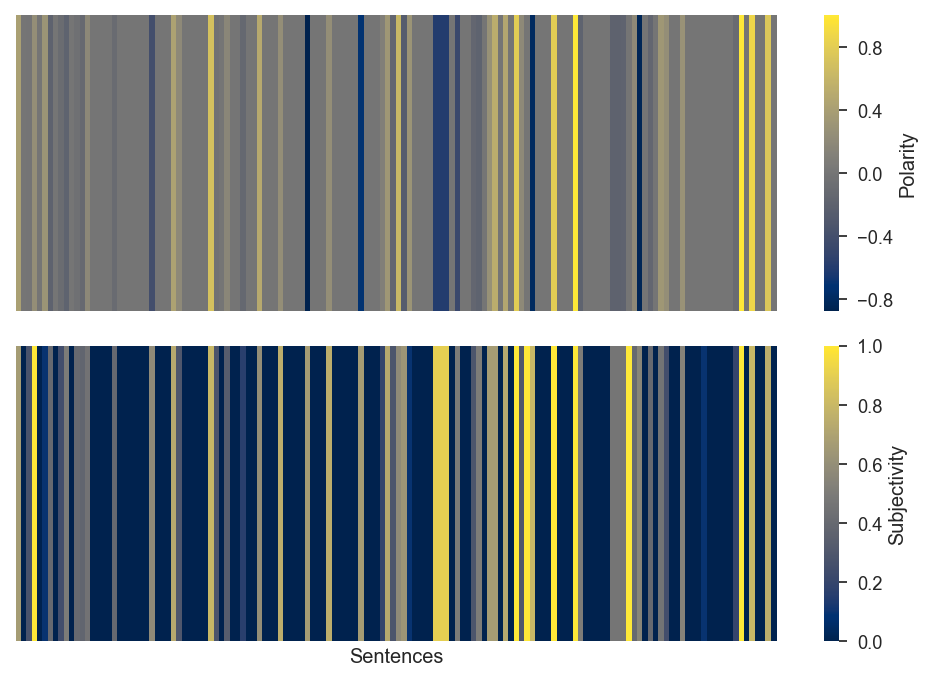

In [251]:
n=20
sns.set(font_scale=1.2)
#map = {i: i for i in range(-1, 1, 0.1)}

cmap = sns.color_palette("cividis")

fig, (ax0,ax1) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,7))

#fig, ax = plt.subplots(figsize=(10,10))
ax0 = sns.heatmap([sentence_pol], cmap='cividis', cbar_kws={'label': 'Polarity', 'orientation': 'vertical'}, ax=ax0)
ax1 = sns.heatmap([sentence_sub], cmap='cividis', cbar_kws={'label': 'Subjectivity', 'orientation': 'vertical'}, ax=ax1)

#ax.set_xlabel(r'Sentences')
#ax.xaxis.label.set_fontsize(20)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels[0] = ''
#labels[1] = 'Subjectivity'
ax0.set_yticklabels(labels, fontsize=18)

#plt.xticks(np.arange(0, len(sentence_pol)+1, 1.0))
ax0.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)
ax1.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

ax1.set_xlabel('Sentences')
#ax0.set_xlabel('Sentences')

#ax1.figure.axes[-1].yaxis.label.set_size(20)


plt.subplots_adjust(wspace=0.01, hspace=0)

plt.tight_layout()

fig.savefig("Phoebe_song_sentiment.png")


In [259]:
df_pol_sub = pd.DataFrame({'Pol': sentence_pol,
                  'Sub': sentence_sub})

df_pol_sub.describe()

,Pol,Sub
count,142.000000,142.000000
mean,0.029338,0.235713
std,0.291545,0.324758
min,-0.875000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.466667
max,1.000000,1.000000


In [266]:
df_pol_sub['Pol'][ df_pol_sub['Pol']>0].corr(df_pol_sub['Sub'][df_pol_sub['Pol']>0])

0.6999011876820016

In [267]:
df_pol_sub['Pol'][ df_pol_sub['Pol']<0].corr(df_pol_sub['Sub'][df_pol_sub['Pol']<0])

-0.7838872921545493

(0, 1.25)

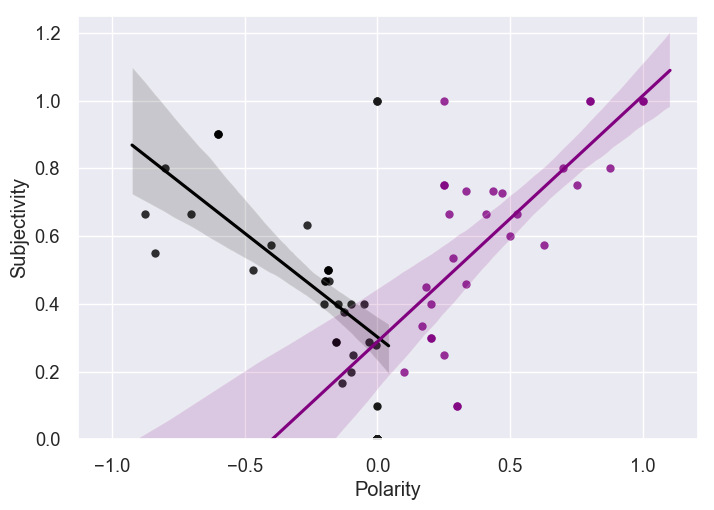

In [315]:
sns.regplot(x = "Pol", y = "Sub", data = df_pol_sub[df_pol_sub['Pol']<0], color='black')
sns.regplot(x = "Pol", y = "Sub", data = df_pol_sub[df_pol_sub['Pol']>0], color='purple')

plt.plot(df_pol_sub['Pol'][df_pol_sub['Pol']==0], df_pol_sub['Sub'][df_pol_sub['Pol']==0], 'ko')

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.ylim(0, 1.25)

(0, 1.25)

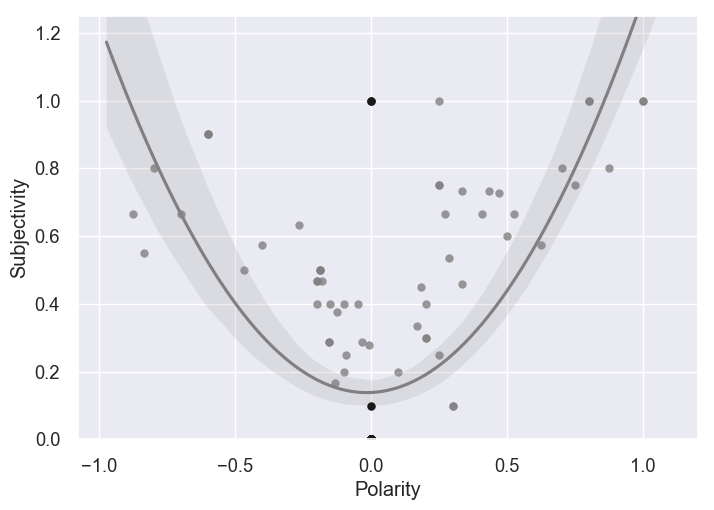

In [319]:
sns.regplot(x = "Pol", y = "Sub", data = df_pol_sub, color='grey', order=2)

plt.plot(df_pol_sub['Pol'][df_pol_sub['Pol']==0], df_pol_sub['Sub'][df_pol_sub['Pol']==0], 'ko')

plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.ylim(0, 1.25)